<a href="https://colab.research.google.com/github/Chhavi007/Apache-Web-Log-Analysis/blob/main/WebLogAnalysis_Chhavi_039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Installing the Packages**


In [ ]:
!pip install advertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.4/286.4 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.3 MB/s eta 0:00:00


In [ ]:
!pip install user_agents

### **Importing the Libraries**

In [ ]:
import advertools as adv
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pyarrow
from ipywidgets import interact
from user_agents import parse
from ua_parser import user_agent_parser

### **Creating the Parquet File and Analysing the Data**

In [ ]:
adv.logs_to_df(
    log_file='log_file.log',
    output_file='output_file.parquet',
    errors_file='errors_file.txt',
    log_format='combined')

Parsed         100,520 lines.


In [ ]:
# Storing the parquet file as dataframe and modifying the datetime column
logs_df = pd.read_parquet('output_file.parquet')
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [ ]:
logs_df.head()

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.116.74.253,-,2022-02-28 14:04:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
1,91.196.124.220,-,2022-02-28 14:04:47+02:00,POST,/wp-cron.php?doing_wp_cron=1646049887.24761605...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
2,91.196.124.220,-,2022-02-28 14:06:45+02:00,POST,/wp-cron.php?doing_wp_cron=1646050005.39478302...,200,NaN,https://nargile.bg/wp-cron.php?doing_wp_cron=1...,WordPress/5.9.1; https://nargile.bg
3,87.116.74.253,-,2022-02-28 14:06:44+02:00,POST,/wp-admin/admin-ajax.php,200,47.0,https://nargile.bg/wp-admin/admin.php?page=wc-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...
4,66.249.70.57,-,2022-02-28 14:06:46+02:00,GET,/category/alpaca-bowls/,200,262929.0,-,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [ ]:
# Read the first 5 lines from file
with open('log_file.log', 'r') as file:
    for i in range(5):
        print(file.readline())

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"

91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"

91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"

87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (

In [ ]:
# Number of rows in file
file_path = 'log_file.log'
with open(file_path, 'r') as file:
    row_count = sum(1 for _ in file)
print(f"Number of rows in the file= {row_count}")

Number of rows in the file= 113039


In [ ]:
print(logs_df.describe())
print("***************************************************************")
print(logs_df.info())

               size
count  9.093400e+04
mean   4.313229e+04
std    8.313419e+04
min    1.000000e+00
25%    2.660000e+03
50%    1.634700e+04
75%    4.490100e+04
max    1.643373e+06
***************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100508 entries, 0 to 100507
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype                                
---  ------      --------------   -----                                
 0   client      100508 non-null  object                               
 1   userid      100508 non-null  object                               
 2   datetime    100508 non-null  datetime64[ns, pytz.FixedOffset(120)]
 3   method      100508 non-null  category                             
 4   request     100508 non-null  object                               
 5   status      100508 non-null  category                             
 6   size        90934 non-null   float64                             

In [ ]:
# Extracting hostname, aliaslist, ipaddrlist from IP address
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,35.210.207.218,2322,2322,0.023103,0.023103,218.207.210.35.bc.googleusercontent.com,,35.210.207.218,None
1,87.116.74.253,1957,4279,0.019471,0.042574,87-116-74-253.ip.btc-net.bg,,87.116.74.253,None
2,91.196.124.220,1896,6175,0.018864,0.061438,ns77.superhosting.bg,,91.196.124.220,None
3,130.204.199.252,1209,7384,0.012029,0.073467,602ad0cd481f.softphone.blizoo.bg,,130.204.199.252,None
4,149.62.203.226,1161,8545,0.011551,0.085018,None,None,None,[Errno 1] Unknown host


### **Calculating Visitors on Different Basis and Visualizing via Graphs**

In [ ]:
# Top 10 visitors
top_visitors = logs_df['client'].value_counts().head(10)
print("Top Visitors:")
print(top_visitors)

Top Visitors:
35.210.207.218     2322
87.116.74.253      1957
91.196.124.220     1896
130.204.199.252    1209
149.62.203.226     1161
212.39.89.183      1112
46.10.120.188      1087
95.42.145.40       1067
149.62.202.254      985
82.137.115.107      979
Name: client, dtype: int64


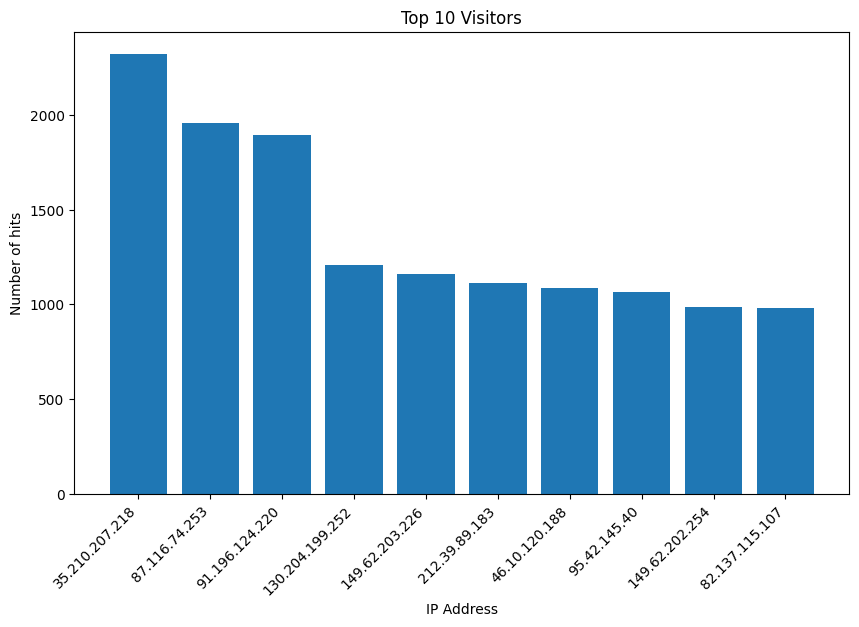

In [ ]:
# Plotting the top 10 visitors IP adresses
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(10), host_df['count'].head(10))
plt.xlabel('IP Address')
plt.ylabel('Number of hits')
plt.title('Top 10 Visitors')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Top 10 Most Frequent Requests
frequency_of_requests = logs_df['request'].value_counts().head(10)
print("Frequency of Requests:")
print(frequency_of_requests)

Frequency of Requests:
/wp-admin/admin-ajax.php                                                                1414
/wp-content/uploads/2021/05/HLGN-Logo.png                                               1302
/?wc-ajax=get_refreshed_fragments                                                       1202
/                                                                                       1151
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                        534
/category/nargileta/                                                                     356
/wp-content/plugins/woocommerce-econt/inc/js/econt.js?ver=1.3.9                          299
/wp-content/plugins/woo-discount-rules/v2/Assets/Js/awdr-dynamic-price.js?ver=2.3.13     297
/wp-content/plugins/woocommerce-econt/inc/css/colorbox.css?ver=5.9.1                     297
/wp-content/plugins/woo-discount-rules/v2/Assets/Js/site_main.js?ver=2.3.13              295
Name: request, dtype: int64


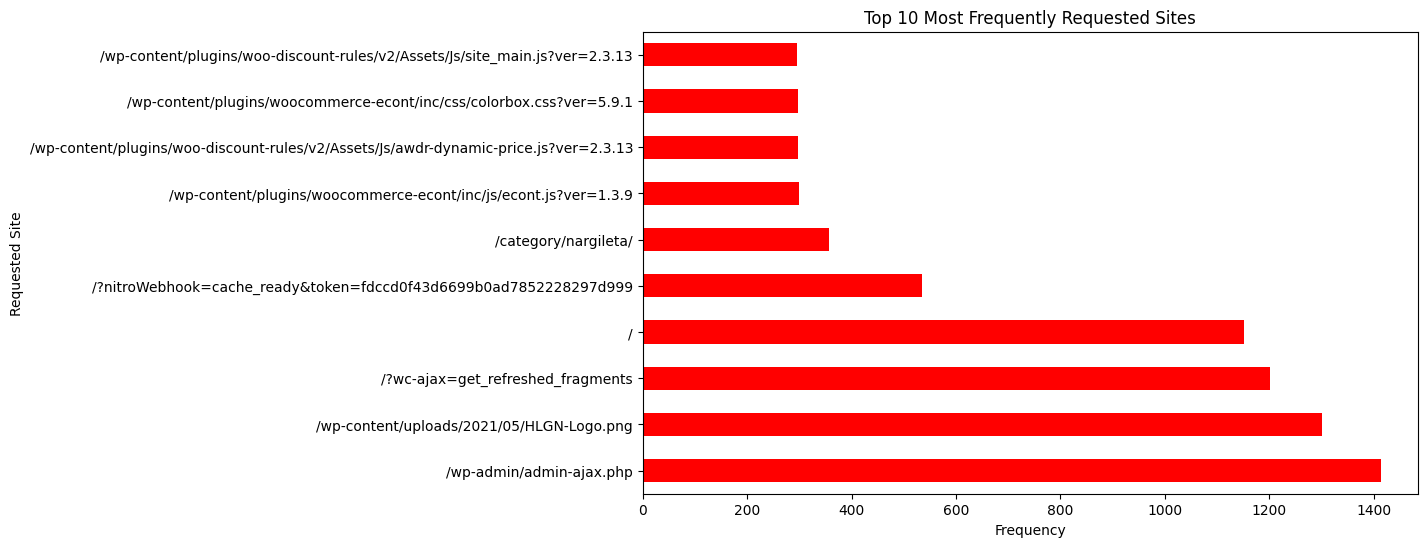

In [ ]:
# Ploting the most frequest requested sites
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='red')
plt.ylabel('Requested Site')
plt.xlabel('Frequency')
plt.title('Top 10 Most Frequently Requested Sites')
plt.show()

In [ ]:
# Distribution of Status Codes
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)

   status  count
0     200  91708
1     201      2
2     206      7
3     301   1695
4     302     76
5     304   4496
6     400     39
7     401    108
8     403     11
9     404   2085
10    405     10
11    406    101
12    500    170


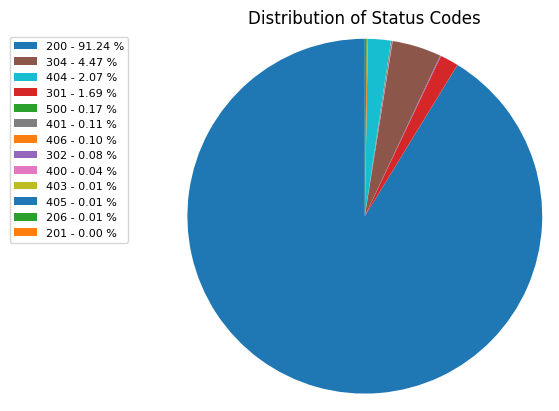

In [ ]:
# Ploting the Status Codes
x = status_df['status']
y = status_df['count']
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))
plt.legend(patches, labels, loc='upper center', bbox_to_anchor=(-0.3, 1),fontsize=8)
plt.savefig('piechart.png', bbox_inches='tight')
plt.title('Distribution of Status Codes')
plt.show()

In [ ]:
# Calculating hourly and average weekly requests
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'])
logs_df['hour'] = logs_df['datetime'].dt.hour
logs_df['day_of_week'] = logs_df['datetime'].dt.dayofweek
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'], utc=True)
hourly_counts = logs_df.groupby(['client', 'hour'])['hour'].count().reset_index(name='request_count')
hourly_counts = hourly_counts.sort_values(by=['request_count'], ascending=False)

weekly_avg = logs_df.groupby(['client', 'day_of_week'])['day_of_week'].count().reset_index(name='request_count')
print(hourly_counts.head(5))
print("**************************************************************")
print(weekly_avg.head(5))

               client  hour  request_count
191    149.62.203.226    21           1161
1445   35.210.207.218     1            883
2298   89.215.133.237    15            879
2330   91.139.164.207    14            815
129   130.204.199.252    16            739
**************************************************************
            client  day_of_week  request_count
0    100.12.47.211            1            148
1   104.143.83.241            0              6
2   104.143.83.241            1              9
3  104.196.137.185            0              1
4  104.196.146.182            0              1


In [ ]:
# Calculating total hits from various browsers
def extract_browser(user_agent):
    ua = parse(user_agent)
    browser_family = ua.browser.family.lower()
    if 'chrome' in browser_family:
        return 'Chrome'
    elif 'firefox' in browser_family:
        return 'Firefox'
    elif 'safari' in browser_family:
        return 'Safari'
    elif 'edge' in browser_family:
        return 'Edge'
    elif 'opera' in browser_family:
        return 'Opera'
    elif 'brave' in browser_family:
        return 'Brave'
    elif 'internet explorer' in browser_family or 'msie' in browser_family:
        return 'Internet Explorer'
    else:
        return 'Other'
logs_df['browser'] = logs_df['user_agent'].apply(extract_browser)
browser_hits = logs_df.groupby('browser').size().reset_index(name='total_hits')
browser_hits = browser_hits.sort_values(by=['total_hits'], ascending=False)
print(browser_hits)

   browser  total_hits
0   Chrome       40651
5   Safari       28196
4    Other       23354
3    Opera        3314
2  Firefox        2905
1     Edge        2088


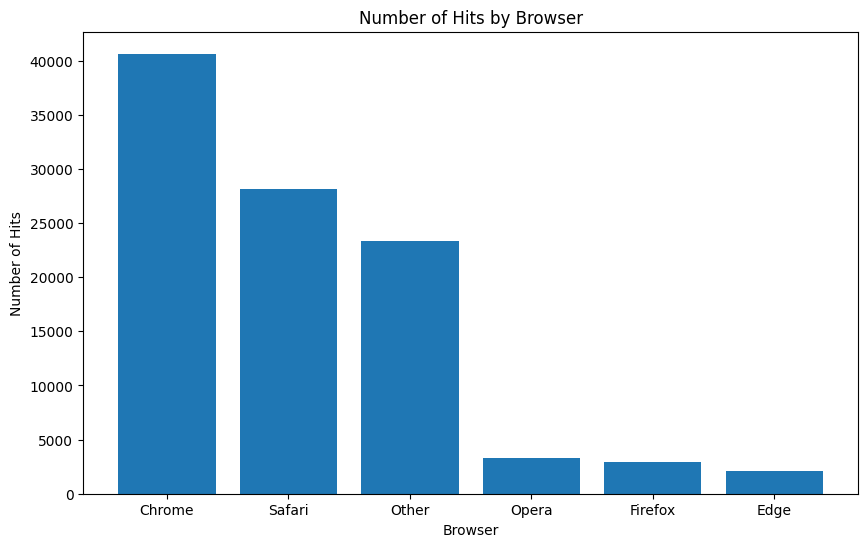

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(browser_hits['browser'], browser_hits['total_hits'])
plt.xlabel('Browser')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Browser')
plt.show()

In [ ]:
# Number of hits by each site per hour
def extract_site(referer):
    if pd.isna(referer):
        return 'Direct'
    else:
        referer_parts = referer.split('/')
        if len(referer_parts) >= 3:
            return referer_parts[2]
        else:
            return 'Unknown'
logs_df['site'] = logs_df['referer'].apply(extract_site)
site_hourly_hits = logs_df.groupby(['site', 'hour']).size().reset_index(name='hits')
site_hourly_pivot = site_hourly_hits.pivot(index='hour', columns='site', values='hits')
site_hourly_pivot = site_hourly_pivot.sort_values(by=['hour'], ascending=False)
print(site_hourly_pivot.head(2))

site  91.196.124.134:80  Unknown  autodiscover.nargile.bg  \
hour                                                        
23                  NaN    160.0                      NaN   
22                  NaN    190.0                      NaN   

site  com.google.android.googlequicksearchbox  cpanel.nargile.bg  \
hour                                                               
23                                        NaN                NaN   
22                                        NaN                NaN   

site  cpcalendars.nargile.bg  cpcontacts.nargile.bg  l.facebook.com  \
hour                                                                  
23                       NaN                    NaN             NaN   
22                       NaN                    NaN             NaN   

site  l.instagram.com  l.messenger.com  ...  webmail.nargile.bg  www.bing.com  \
hour                                    ...                                     
23                2.0              

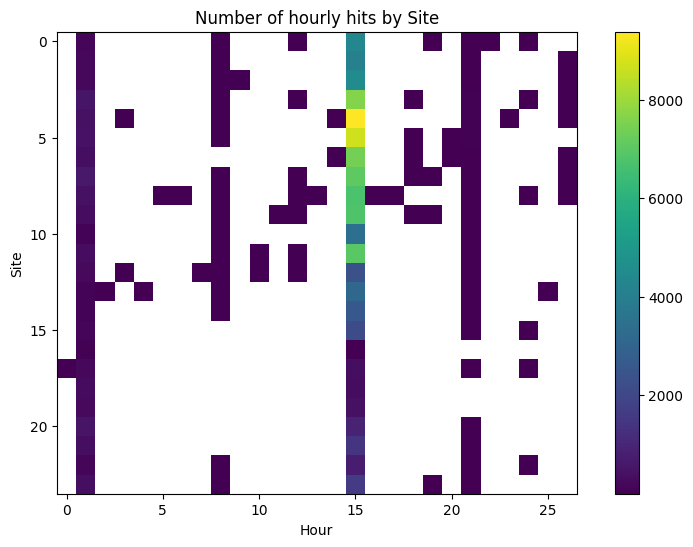

In [ ]:
# Visualizing the hourly hit by each site
plt.figure(figsize=(10, 6))
plt.imshow(site_hourly_pivot)
plt.xlabel('Hour')
plt.ylabel('Site')
plt.title('Number of hourly hits by Site')
plt.colorbar()
plt.show()

In [ ]:
# Group data by hour and count hits
hourly_hits = logs_df.groupby('hour').size().reset_index(name='total_hits')
# Sort by total hits
hourly_hits = hourly_hits.sort_values(by=['total_hits'], ascending=False)
print(hourly_hits.head(5))

    hour  total_hits
19    19        9859
18    18        9236
20    20        8241
17    17        7799
16    16        7744


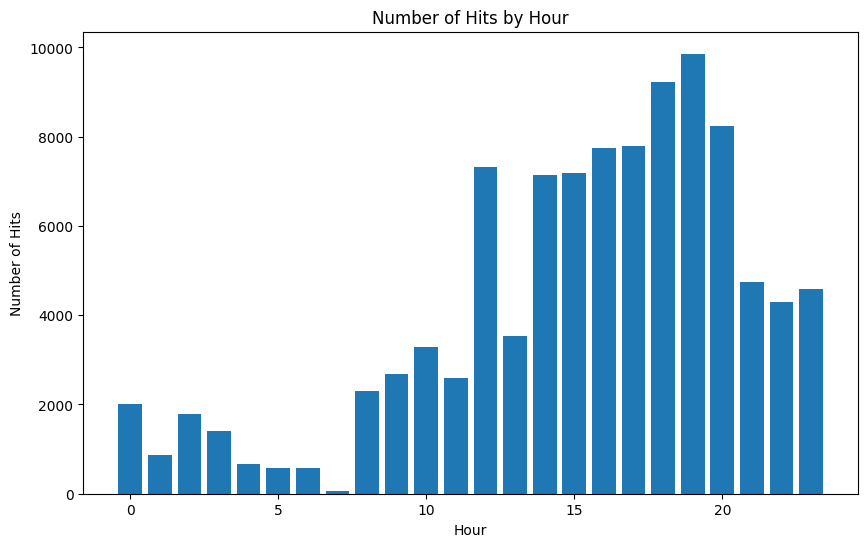

In [ ]:
# Visualizing the number of hits for each hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_hits['hour'], hourly_hits['total_hits'])
plt.xlabel('Hour')
plt.ylabel('Number of Hits')
plt.title('Number of Hits by Hour')
plt.show()

In [ ]:
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)
ua_df.head(5)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
1,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
2,WordPress/5.9.1; https://nargile.bg,WordPress,5,9,1,Other,None,None,None,None,Spider,Spider,Desktop
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Chrome,98,0,4758,Mac OS X,10,15,7,None,Mac,Apple,Mac
4,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,Googlebot,2,1,None,Other,None,None,None,None,Spider,Spider,Desktop


In [ ]:
# Calculating the users as per browsers and operating system
browser_os_df = ua_df[['ua_family', 'ua_os.family']]
browser_os_counts = browser_os_df.groupby(['ua_family', 'ua_os.family']).size().reset_index(name='count')
print(browser_os_counts.head(10))

      ua_family ua_os.family  count
0     AhrefsBot        Other    112
1       Android      Android      1
2    Apple Mail     Mac OS X      1
3      Applebot     Mac OS X    132
4  AwarioRssBot        Other      1
5   BingPreview      Windows      4
6     CFNetwork          iOS      2
7        Chrome      Android    490
8        Chrome        Linux      7
9        Chrome     Mac OS X   2831


In [ ]:
top = browser_os_counts.sort_values(by=['count'], ascending=False)
print(top.head(5))

   ua_family ua_os.family  count
9     Chrome     Mac OS X   2831
7     Chrome      Android    490
3   Applebot     Mac OS X    132
0  AhrefsBot        Other    112
8     Chrome        Linux      7


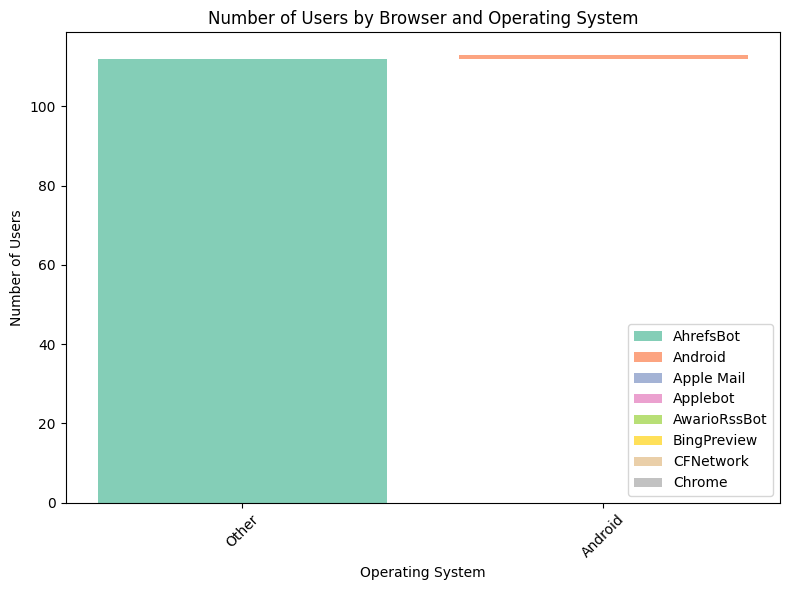

In [ ]:
browser_os_counts = browser_os_counts.head(15)
# Visualizing the users as per OS and Browswers
browser_names = browser_os_counts["ua_family"].unique()
fig, ax = plt.subplots(figsize=(8,6))
bottom = 0
for browser_name in browser_names:
    browser_os_data = browser_os_counts[browser_os_counts["ua_family"] == browser_name]
    ax.bar(
        browser_os_data["ua_os.family"],
        browser_os_data["count"],
        label=browser_name,
        color=plt.cm.Set2(browser_names.tolist().index(browser_name)),
        bottom=bottom,
        alpha=0.8,
    )
    bottom += browser_os_data["count"]
ax.set_xlabel("Operating System")
ax.set_ylabel("Number of Users")
ax.set_title(f"Number of Users by Browser and Operating System")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Conclusion**:
A detailed analysis has been done on Apache Web Log Dataset from Kaggle.

After performing certain operations, few concluding points for this data are as follows:
  1. More than 91% of requests had status code 200, that means, their retrieval has been successful.
  2. As per this dataset, two most popular web browsers used for surfing are Chrome and Safari.
  3. The top hourly hits are in the 19th hour ,i.e., around 7 pm.
  4. The top combination used for surfing is Chrome and Mac OS X.
  5. The hourly hit by user 149.62.203.226 at the 21st hour is 1161 is the highest of this dataset


Further, a report could also be generated on these features which can be used to notify about any malicious activity happened.